In [1]:
import tensorflow as tf
from tensorflow.keras import layers, optimizers, losses
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report
import numpy as np
import glob  

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


EfficientNet


In [ ]:
!pip install efficientnet


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from efficientnet.tfkeras import EfficientNetB0
from sklearn.utils.class_weight import compute_class_weight
import os

In [7]:
# Define your dataset directories
train_path = 'Trimmed_AID_dataset/train'
val_path = 'Trimmed_AID_dataset/val'

In [10]:


# Define image data generators for train and validation sets with data augmentation
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# Define batch size
batch_size = 32

# Create train and validation data generators
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),  # EfficientNetB0 input size
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=(224, 224),  # EfficientNetB0 input size
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 1346 images belonging to 30 classes.
Found 672 images belonging to 30 classes.


In [ ]:
# Load the EfficientNetB0 model pretrained on ImageNet
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model
base_model.trainable = True


# Define the model architecture
EfficientNetB0_model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(30, activation='softmax')
])

In [15]:
# Compile the model
EfficientNetB0_model.compile(optimizer='adam',
                             loss='categorical_crossentropy',
                             metrics=['accuracy'])

In [16]:
from tensorflow.keras.callbacks import EarlyStopping

In [17]:
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

In [18]:
# Train the model with early stopping
history = EfficientNetB0_model.fit(train_generator, epochs=100, validation_data=val_generator, callbacks=[early_stopping,reduce_lr])

Epoch 1/100
43/43 [==============================] - 234s 5s/step - loss: 1.7604 - accuracy: 0.5498 - val_loss: 3.9775 - val_accuracy: 0.3214 - lr: 0.0010
Epoch 2/100
43/43 [==============================] - 219s 5s/step - loss: 0.5414 - accuracy: 0.8514 - val_loss: 2.1582 - val_accuracy: 0.5461 - lr: 0.0010
Epoch 3/100
43/43 [==============================] - 218s 5s/step - loss: 0.3899 - accuracy: 0.8796 - val_loss: 3.0605 - val_accuracy: 0.5461 - lr: 0.0010
Epoch 4/100
43/43 [==============================] - 214s 5s/step - loss: 0.3922 - accuracy: 0.8848 - val_loss: 2.0725 - val_accuracy: 0.6012 - lr: 0.0010
Epoch 5/100
43/43 [==============================] - 219s 5s/step - loss: 0.2765 - accuracy: 0.9160 - val_loss: 2.0207 - val_accuracy: 0.6339 - lr: 0.0010
Epoch 6/100
43/43 [==============================] - 175s 4s/step - loss: 0.2879 - accuracy: 0.9168 - val_loss: 2.5076 - val_accuracy: 0.6161 - lr: 0.0010
Epoch 7/100
43/43 [==============================] - 177s 4s/step - lo

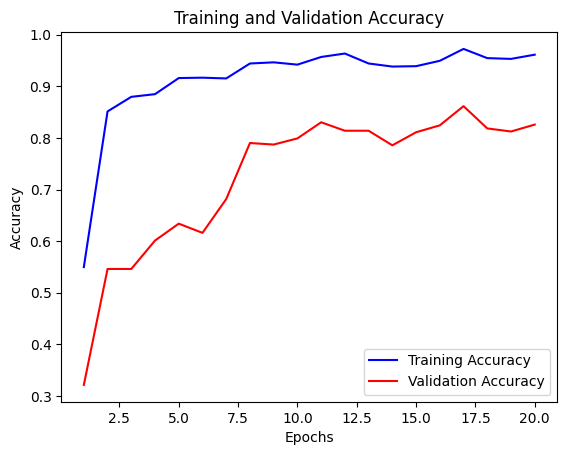

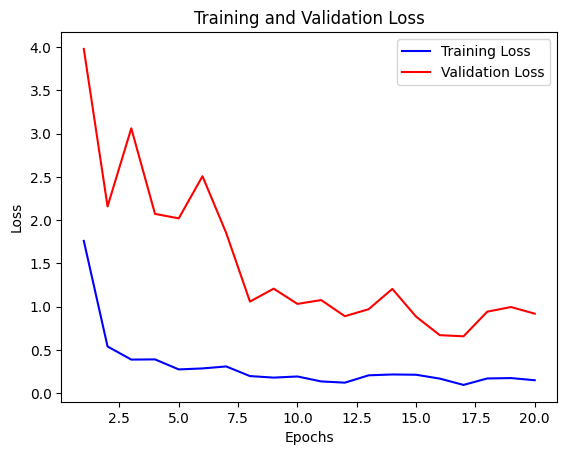

In [19]:
import matplotlib.pyplot as plt

# Get training history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_accuracy) + 1)

# Plot training and validation accuracies
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()

# Plot training and validation losses
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [20]:
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [21]:
test_generator = test_datagen.flow_from_directory(
    'Trimmed_AID_dataset/test',
    target_size=(224, 224),  # EfficientNetB0 input size
    batch_size=batch_size,
    class_mode='categorical'
)

Found 1351 images belonging to 30 classes.


In [22]:
# Evaluate the model on the test data
test_loss, test_accuracy = EfficientNetB0_model.evaluate(test_generator)
# Access the training and validation accuracies from the history object
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Print the training and validation accuracies
print("Training set accuracy:", train_accuracy[-1])  # Accuracy from the last epoch
print("Validation set accuracy:", val_accuracy[-1])  # Accuracy from the last epoch
# Print the test set accuracy
print("Test set accuracy:", test_accuracy)

43/43 [==============================] - 48s 1s/step - loss: 0.6688 - accuracy: 0.8690
Training set accuracy: 0.9613670110702515
Validation set accuracy: 0.8258928656578064
Test set accuracy: 0.8689859509468079


In [23]:
import numpy as np
from sklearn.metrics import classification_report

In [24]:
# Make predictions on the validation set
val_predictions = EfficientNetB0_model.predict(val_generator)
val_pred_labels = np.argmax(val_predictions, axis=1)

21/21 [==============================] - 19s 833ms/step


In [25]:
# Get true labels
val_true_labels = val_generator.classes


In [26]:
# Print classification report
print(classification_report(val_true_labels, val_pred_labels))

              precision    recall  f1-score   support

           0       0.88      0.75      0.81        20
           1       0.94      0.75      0.83        20
           2       0.95      0.90      0.92        20
           3       1.00      0.95      0.97        20
           4       0.94      0.80      0.86        20
           5       0.58      0.75      0.65        20
           6       0.55      0.80      0.65        20
           7       0.79      0.75      0.77        20
           8       0.74      1.00      0.85        20
           9       0.86      0.95      0.90        20
          10       0.90      0.90      0.90        20
          11       0.95      0.90      0.92        20
          12       0.85      0.85      0.85        20
          13       0.71      1.00      0.83        20
          14       1.00      0.95      0.97        20
          15       1.00      1.00      1.00        20
          16       0.79      0.55      0.65        20
          17       1.00    

In [27]:
# Get class labels from the train_generator
class_labels = list(train_generator.class_indices.keys())

print(class_labels)

['Airport', 'BareLand', 'BaseballField', 'Beach', 'Bridge', 'Center', 'Church', 'Commercial', 'DenseResidential', 'Desert', 'Farmland', 'Forest', 'Industrial', 'Meadow', 'MediumResidential', 'Mountain', 'Park', 'Parking', 'Playground', 'Pond', 'Port', 'RailwayStation', 'Resort', 'River', 'School', 'SparseResidential', 'Square', 'Stadium', 'StorageTanks', 'Viaduct']


In [28]:
class_count = len(class_labels)

In [29]:
import numpy as np

In [41]:
# Load external image
from tensorflow.keras.preprocessing import image

# Load the image
img_path = 'Pics/unnamed.jpg'
external_img = image.load_img(img_path, target_size=(224, 224))

# Convert image to array
external_img_array = image.img_to_array(external_img)
external_img_array = np.expand_dims(external_img_array, axis=0)

# Preprocess the image
external_img_array /= 255.

# Make predictions on external image
external_img_pred = EfficientNetB0_model.predict(external_img_array)
external_img_pred_label = np.argmax(external_img_pred)

# Print prediction
print("Predicted class label:", class_labels[external_img_pred_label])

1/1 [==============================] - 0s 105ms/step
Predicted class label: Desert


End


In [95]:
# Save the model
EfficientNetB0_model.save("efficientnet_model.h5")
